In [1]:
import pandas as pd
withapo=pd.read_csv('testing_result_with_APO.tsv', sep = '\t', index_col = 0)
rbponly=pd.read_csv('testing_result_RBPonly.tsv', sep = '\t', index_col = 0)

In [2]:
withapo.head()

,ALT.apo,REF.apo,ALT.rbp,REF.rbp,p_apo,fitted,pvalue
Row.names,,,,,,,
chr1:100007034|100017815,0,2720,0,1067,0.0,0.001605,0.372588
chr1:100011365|100017815,0,2622,0,371,0.0,0.001605,0.246603
chr1:100043073|100061949,0,3368,2,7087,0.0,0.001605,0.428402
chr1:100049909|100061949,0,2217,1,2931,0.0,0.001605,0.381308
chr1:100049909|100069685,0,8560,2,16533,0.0,0.001605,0.518876


In [3]:
withapo.columns

Index(['ALT.apo', 'REF.apo', 'ALT.rbp', 'REF.rbp', 'p_apo', 'fitted',
       'pvalue'],
      dtype='object')

In [4]:
all_data = rbponly.merge(withapo[['fitted', 'pvalue']], left_index = True,
              right_index = True, suffixes = ('.RBP_only', '.APO_as_cov')
             )

In [5]:
all_data

,ALT.apo,REF.apo,ALT.rbp,REF.rbp,p_apo,fitted.RBP_only,pvalue.RBP_only,fitted.APO_as_cov,pvalue.APO_as_cov
Row.names,,,,,,,,,
chr1:100007034|100017815,0,2720,0,1067,0.000000,0.00205,0.407727,0.001605,0.372588
chr1:100011365|100017815,0,2622,0,371,0.000000,0.00205,0.279602,0.001605,0.246603
chr1:100043073|100061949,0,3368,2,7087,0.000000,0.00205,0.463954,0.001605,0.428402
chr1:100049909|100061949,0,2217,1,2931,0.000000,0.00205,0.417376,0.001605,0.381308
chr1:100049909|100069685,0,8560,2,16533,0.000000,0.00205,0.551996,0.001605,0.518876
...,...,...,...,...,...,...,...,...,...
chrX:97099694|97141794,0,1391,0,2066,0.000000,0.00205,0.482022,0.001605,0.447706
chrX:97114726|97141794,0,837,0,1223,0.000000,0.00205,0.423601,0.001605,0.388534
chrX:97383909|97429745,0,1998,0,3374,0.000000,0.00205,0.532502,0.001605,0.499366


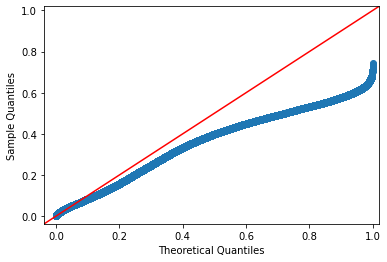

In [6]:
import statsmodels.api as sm
import scipy
p = sm.qqplot(all_data['pvalue.RBP_only'], line ='45',
             dist=scipy.stats.uniform)

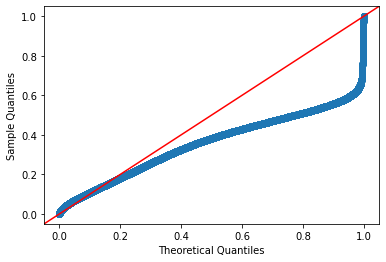

In [7]:
p = sm.qqplot(all_data['pvalue.APO_as_cov'], line ='45',
             dist=scipy.stats.uniform)

# data is underdispersed

# Evaluate

In [8]:
transcirc = pd.read_csv('transcirc_metadata.tsv', sep = '\t')
transcirc['circ_id']=transcirc['chrom']+':'+transcirc['start'].astype(str)+'|'+transcirc['end'].astype(str)
transcirc.drop_duplicates(subset = ['circ_id'], inplace = True)

In [9]:
all_data['m6A']=transcirc.set_index('circ_id')['m6A'].replace({1:True, 0:False})

In [10]:
all_data['m6A'].value_counts()

False    34051
True      4077
Name: m6A, dtype: int64

In [11]:
all_data = all_data.dropna()

In [12]:
all_data['m6A'].value_counts()

False    34051
True      4077
Name: m6A, dtype: int64

In [13]:
all_data['pvalue.APO_as_cov']

Row.names
chr1:100007034|100017815    0.372588
chr1:100011365|100017815    0.246603
chr1:100043073|100061949    0.428402
chr1:100049909|100061949    0.381308
chr1:100049909|100069685    0.518876
                              ...   
chrX:97072941|97114965      0.443934
chrX:97099694|97114965      0.393542
chrX:97099694|97141794      0.447706
chrX:97114726|97141794      0.388534
chrX:97383909|97429745      0.499366
Name: pvalue.APO_as_cov, Length: 38128, dtype: float64

/scratch/hsher/33730939.tscc-mgr7.local/ipykernel_9304/1584122530.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['p_rbp']=all_data['ALT.rbp']/(all_data['ALT.rbp']+all_data['REF.rbp'])


Text(0.5, 1.0, 'Circle level YTHDF2 binding site (circ-STAMP)')

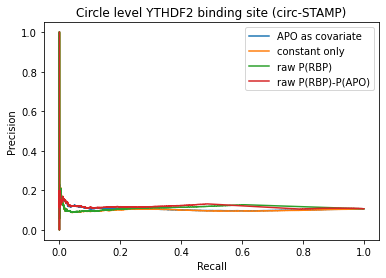

In [23]:
import numpy as np
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

all_data['p_rbp']=all_data['ALT.rbp']/(all_data['ALT.rbp']+all_data['REF.rbp'])


f, ax = plt.subplots()
precision, recall, thresholds = precision_recall_curve(all_data['m6A'].astype(int), 1-all_data['pvalue.APO_as_cov'])
ax.plot(recall, precision, label = 'APO as covariate')
        
precision, recall, thresholds = precision_recall_curve(all_data['m6A'].astype(int), 1-all_data['pvalue.RBP_only'])
ax.plot(recall, precision, label = 'constant only')

precision, recall, thresholds = precision_recall_curve(all_data['m6A'].astype(int), all_data['p_rbp'])
ax.plot(recall, precision, label = 'raw P(RBP)')

precision, recall, thresholds = precision_recall_curve(all_data['m6A'].astype(int), all_data['p_rbp']-all_data['p_apo'])
ax.plot(recall, precision, label = 'raw P(RBP)-P(APO)')

plt.legend()

plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Circle level YTHDF2 binding site (circ-STAMP)')

In [15]:
all_data['total_reads.rbp']=all_data['ALT.rbp']+all_data['REF.rbp']

/scratch/hsher/33730939.tscc-mgr7.local/ipykernel_9304/1586423019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['total_reads.rbp']=all_data['ALT.rbp']+all_data['REF.rbp']


In [16]:
all_data['total_reads_bin'] = pd.qcut(all_data['total_reads.rbp'], q = 1000, labels = False)

/scratch/hsher/33730939.tscc-mgr7.local/ipykernel_9304/1371845436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['total_reads_bin'] = pd.qcut(all_data['total_reads.rbp'], q = 1000, labels = False)


In [17]:
all_data[['total_reads_bin', 'total_reads.rbp']]

,total_reads_bin,total_reads.rbp
Row.names,,
chr1:100007034|100017815,150,1067
chr1:100011365|100017815,31,371
chr1:100043073|100061949,756,7089
chr1:100049909|100061949,442,2932
chr1:100049909|100069685,930,16535
...,...,...
chrX:97072941|97114965,311,1996
chrX:97099694|97114965,188,1277
chrX:97099694|97141794,322,2066


In [18]:
all_data['total_reads.rbp']

Row.names
chr1:100007034|100017815     1067
chr1:100011365|100017815      371
chr1:100043073|100061949     7089
chr1:100049909|100061949     2932
chr1:100049909|100069685    16535
                            ...  
chrX:97072941|97114965       1996
chrX:97099694|97114965       1277
chrX:97099694|97141794       2066
chrX:97114726|97141794       1223
chrX:97383909|97429745       3374
Name: total_reads.rbp, Length: 38128, dtype: int64

In [19]:
all_data.loc[all_data['total_reads_bin']>998].sort_values(by = 'p_apo')

,ALT.apo,REF.apo,ALT.rbp,REF.rbp,p_apo,fitted.RBP_only,pvalue.RBP_only,fitted.APO_as_cov,pvalue.APO_as_cov,m6A,p_rbp,total_reads.rbp,total_reads_bin
Row.names,,,,,,,,,,,,,
chr12:53454726|53471807,0,19103,16,72094,0.000000,0.00205,0.514557,0.001605,0.480051,True,0.000222,72110,999
chr18:21765772|21782763,1,74940,16,81722,0.000013,0.00205,0.527363,0.001608,0.493889,True,0.000196,81738,999
chr12:53018798|53028188,1,46301,5,85112,0.000022,0.00205,0.628994,0.001610,0.599855,False,0.000059,85117,999
chr19:41268223|41294686,1,38210,12,79007,0.000026,0.00205,0.551195,0.001611,0.519158,False,0.000152,79019,999
chr5:134910335|134970092,4,139464,23,216941,0.000029,0.00205,0.586636,0.001611,0.556035,False,0.000106,216964,999
chr5:179822958|179833782,1,34015,61,70489,0.000029,0.00205,0.358955,0.001612,0.322680,False,0.000865,70550,999
chr7:135577796|135593192,5,76472,10,79370,0.000065,0.00205,0.567951,0.001619,0.538460,False,0.000126,79380,999
chr11:9420411|9436366,3,40974,10,75419,0.000073,0.00205,0.563187,0.001621,0.533899,False,0.000133,75429,999
chr18:21765772|21791557,7,83083,14,90489,0.000084,0.00205,0.550081,0.001623,0.520829,True,0.000155,90503,999


In [20]:
# high rate has "MIXED" type from vcf

999 nan
998 95519.43589743589
997 78809.51948051948
996 70243.28947368421
995 64651.790849673205
994 60868.74869109948
993 57958.44541484716
992 55576.58426966292
991 53494.34967320262
990 51758.354651162794
989 50239.39528795811
988 48897.87380952381
987 47696.14410480349
986 46608.36491935484
985 45622.02808988764
984 44717.503496503494
983 43868.6612111293
982 43105.40986132512
981 42390.95050946143
980 41722.31034482759
979 41099.681520314545
978 40510.16978776529
977 39953.482717520856
976 39422.77194982896
975 38902.80021834061
974 38417.10587002096
973 37951.64112903226
972 37504.2213592233
971 37075.486891385764
970 36665.46383363472
969 36271.94493006993
968 35893.884094754656
967 35521.02457002457
966 35170.826052422555
965 34832.865844255975
964 34504.45243445693
963 34185.53241077931
962 33876.400425230335
961 33577.647342995166
960 33287.6630800269
959 32998.3001310616
958 32724.805626598467
957 32458.101123595505
956 32198.267073170733
955 31944.705601907033
954 31696.217

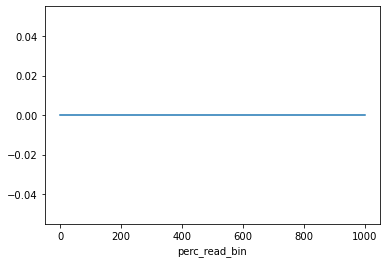

In [21]:
FDR_threshold = 0.2
from statsmodels.stats.multitest import fdrcorrection

n_rejected = []
for nread_bin in sorted(all_data['total_reads_bin'].unique(), reverse = True):
    print(nread_bin, all_data.loc[all_data['total_reads_bin']>nread_bin,'total_reads.rbp'].mean())
    rejected, fdr = fdrcorrection(all_data.loc[all_data['total_reads_bin']>nread_bin, f'pvalue.APO_as_cov'],
                                  alpha = FDR_threshold)
    n_rejected.append([nread_bin, rejected.sum()])
n_rejected = pd.DataFrame(n_rejected, columns = ['perc_read_bin', 'n_rejected'])
n_rejected.set_index('perc_read_bin')['n_rejected'].plot()
threshold = n_rejected.set_index('perc_read_bin')['n_rejected'].idxmax()

In [22]:
threshold

999